# Introduction to Artificial Neural Networks with Keras
This notebook take a look at how to implement neural networks using the popular Keras API.

In [28]:
# Import modules
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras

In [29]:
fashion_mnsit = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnsit.load_data()

print(f'The shape of X_train_full is {X_train_full.shape}')
print(f'The shape of y_train_full is {y_train_full.shape}')

The shape of X_train_full is (60000, 28, 28)
The shape of y_train_full is (60000,)


In [30]:
# Creating a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [31]:
# Naming classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle Boot']

- First line creates a ```Sequential``` model composed of a single stack of layers connected
sequentially
- ```Flatten``` layer converts each input image into a 1D array. It receives input data ```X``` and
computes ```X.reshape(-1, 1)```. Since it is the first layer of the model the ```input_shape```
is specified
- ```Dense``` layer is added with 300 neurons, which uses the ReLU activation function. Each
```Dense``` layer manages its own weight matrix, containing the connection weights between the
neurons and their inputs. It manages a vector bias term (one per neuron)
- Second ```Dense``` hidden layer is added with 100 neurons, also using ReLU activation
- Final ```Dense``` layer with 10 neurons (one per class), using the softmax activation function
(because the classes are exclusive)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [33]:
# Same as above
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The model's ```summary()``` method displays all the model's layers, including each layer's name,
its output shape (```None``` means that the batch size can be anything), and its number of
parameters. The summary ends with the number of the models trainable and non-trainable parameters.

The ```Dense``` layers have a lot of parameters. For example, the first hidden layer has $784 *
300$ connection weights, plus 300 bias terms, which adds up to 235,500 parameters. This gives the
model a lot of flexibility to fit the training data, but it also runs the risk of overfitting.

In [34]:
# Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Investigating a model's layers can be done by index or by layer name.


In [35]:
# Layer names
print(model.layers)
hidden1 = model.layers[1]
print(f'\nName of the firts hidden layer is: {hidden1.name}')

[<tensorflow.python.keras.layers.core.Flatten object at 0x000001CCE6E46F48>, <tensorflow.python.keras.layers.core.Dense object at 0x000001CCE6E46B88>, <tensorflow.python.keras.layers.core.Dense object at 0x000001CC8026E388>, <tensorflow.python.keras.layers.core.Dense object at 0x000001CCE72A7E08>]

Name of the firts hidden layer is: dense_12


Parameters of the layers may be accessed using ist ```get_weights()``` and ```set_weights()```
methods. For a ```Dense``` layer this includes both its connection weights and bias terms.

Notice that ```Dense``` layer initialized the connection weights randomly (required to break
symmetry).

In [36]:
# Weights/Biases information
weights, biases = hidden1.get_weights()
print(f'hidden1 weights are: {weights}')
print(f'\nShape of hidden1 weights is {weights.shape}')
print(f'\nBiases of hidden1 are {biases}')
print(f'\nShape of hidden1 biases is {biases.shape}')

hidden1 weights are: [[-0.06345854 -0.06905054 -0.07025081 ... -0.03615954 -0.01667188
  -0.00836188]
 [-0.0269382   0.02294003  0.070044   ...  0.06111094 -0.00566148
   0.06910914]
 [ 0.0721983   0.02136368 -0.0112591  ...  0.02527905 -0.05707027
  -0.03314446]
 ...
 [ 0.0608857   0.04216472  0.03363504 ... -0.00691424 -0.02988124
   0.01430583]
 [-0.0017959   0.02841232  0.04767057 ... -0.02977363 -0.03300786
   0.0582788 ]
 [-0.00278129 -0.04934682 -0.02309121 ... -0.03704989  0.00746377
   0.01983683]]

Shape of hidden1 weights is (784, 300)

Biases of hidden1 are [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

### Compiling the Model
After a model is created, ```compile()``` method must be called to specify the loss function and
the optimizer to use.

This model will use ```"sparse_categorical_crossentropy"``` because  there are sparse labels and
the classes are exclusive.

The optimizer is ```"sgd"``` which means that the model will be trained using Stochastic Gradient
 Descent. Keras will perform the backpropagation algorithm (reverse-mode autodiff plus Gradient
 Descent)

In [37]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Training and Evaluating the Model
The model is simply trained by calling its ```fit()``` method.

The input features (```X_train```) and the target class (```y_train```) are passed, along with
the number of epochs to train. The validation set is also passed. Keras will measure the loss and
 extra metrics on this set at the end of each epoch, which is useful to see how well the model
 performs.

At each epoch during training, Keras displays
  the number of instances processed so far, the mean training time per sample and the loss and
  accuracy on both the training and validation set.

If the performance on the training set is much better than the performance on the
validation set, the model is probably overfitting. In this case, the final validation accuracy is
 about 89.1 and the training accuracy is 91.8 so there does not seem to be much overfitting.

In [38]:
# Model training
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.7076 - accuracy: 0.7681 - val_loss: 0.5336 - val_accuracy: 0.8174

The ```fit()``` method returns a ```History``` object containing the training parameters
(```history.params```), the list of epochs it went through (```history.epochs```) and a
dictionary (```history.history```) containing the loss and extra metrics it measured at the end
of each epoch on the training and validation set. These may be used to plot the learning curves.


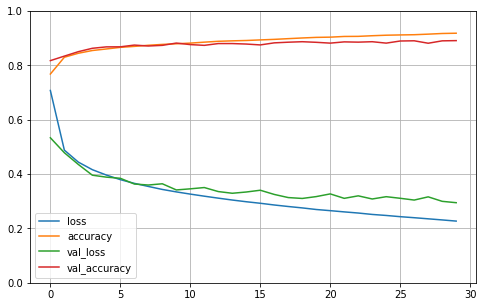

In [45]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In the graph, both training and validation accuracy steadily increase, while training and
validation loss steadily decrease. The validation curves are close to the training curves which
shows that there isn't too much overfitting.

We can tell that the model has not quite converged as the loss is still decreasing. This means
that the model can continue training. By calling the ```fit()``` method again, Keras will
continue training where it left off.

If we are not satisfied with the performance of the model, the hyperparameters should be tuned.
The first one to check is the *learning rate*. If that does not help, change the optimizer and
then again change the learning rate.

In [46]:
# Evaluating the model
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 66.6215 - accuracy: 0.8478


[66.62151383285523, 0.8478]

### Using the Model to Make Predictions
The models ```predict()``` method can be used to make predictions on new instances.

In [50]:
# Making predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
# Returning classes
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]

[9 2 1]


array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

## Building a Regression MLP Using the Sequential API
This section will use the California housing problem dataset to learn and train a regression
neural network.

In [63]:
# Import modules
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


Building a regression MLP model to make predictions follows similar steps to the build of a
classification model. There is one big difference, the output layer for the regression model has
a single neuron (since we are predicting a single value) and uses no activation function and the
loss function is the mean squared error.

In [55]:
# Build model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Compile model
model.compile(loss='mean_squared_error', optimizer='sgd')

# Fit model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate model
mse_test = model.evaluate(X_test, y_test)

# Predict
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.7577 - val_loss: 0.5198
Epoch 2/20
11610/11610 [==============

## Building Complex Models Using the Functional API
Building ```Sequential``` models is quite easy to do via the API. In order to build neural
networks with a more complex topology or with multiple inputs and outputs, Keras offers the
```Functional API```

An example of a nonsequential neural network is a *Wide & Deep* neural network. It connects all
inputs directly to the output layer. This architecture makes it possible fir the neural network
to learn both deep patterns (using the deep path) and simple rule (following the short path).


In [72]:
# Wide and Deep model
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

- First we create an ```Input``` object. This is a specification of the kind of input the model
will get, including its ```shape``` and ```dtype```
- Next, a ```Dense``` layer is created with 30 neurons using the ReLU activation function. Notice
 how it is called like a function, passing it the input. This is why it is called the Functional
 API. We are telling Keras how to connect the layers
- A second hidden layer is created, again used as a function, passing it the output of the first
hidden layer
- Next, a ```Concatenate``` layer is created. It is used again as a function, to concatenate the
input and the output of the second hidden layer.
- Then the output layer is created, with a single neuron and no activation function. Called as a
function, passing it the result of the concatenation
- Lastly, we create a Keras ```Model```, specifying which inputs and outputs to use

In [73]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=output)


In [75]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A,
                                                                                   X_valid_B),
                                                                                  y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 118us/sample - loss: 2.5074 - val_loss: 1.3312

There are various cases as to why you would want multiple outputs:

- The task may demand it. Locate and classify the main object in a picture. This is both a
regression task (finding the coordinates) and a classification task.
- Another use case is as a regularization technique. Adding some auxiliary outputs in a neural
network architecture to ensure the underlying part of the network learns something useful on its
 own without relying on the other part of the network

## Saving and Restoring a Model
When using the Sequential or Functional API saving a model is quite simple.

In [79]:
# Save model
print(model)
model.save('my_keras_model.h5')

Typically three will be a script that train a model and saves it, and one or more scripts (web
service) that loads the model and makes predictions.

In [80]:
# Load model
model = keras.models.load_model('my_keras_model.h5')


## Using Callbacks
Models might train for several hours and in these cases not only should the model be saved once
training has ended but it should also be trained periodically during training. The ```fit()```
method accepts a ```callbacks``` argument that allows a list of objects that Keras will call at
the start and end of training, at the start and end of each epoch, and even before ad after
processing each batch.

The ```ModelCheckpoint``` callback saves checkpoints of the model at regular intervals during
training, by default at the end of each epoch.




In [83]:
# Build and compile model
# Checkpoint saving
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A,
                                                                                   X_valid_B),
                                                                                  y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 98us/sample - loss: 0.4684 - val_loss: 0.4243

If using a validation set during training ```save_best_only=Tryue``` can be set when creating the
 ```ModelCheckpoint```. Here, Keras will only save the model when its performance on the
 validation set is the best so far. This way there is no worry about the model training for too
 long and overfitting as the saved model will be the best model on the validation set.

In [84]:
# Best validation model
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A,
                                                                                   X_valid_B),
                                                                                  y_valid),
                    callbacks=[checkpoint_cb])
# Load best validation model
model = keras.models.load_model('my_keras_model.h5')

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.4245 - val_loss: 0.3836

The ```EarlyStopping``` callback interrupts training when it measures no progress on the
validation set for a number of epochs (defined by the ```patience``` argument). Both of these
callbacks can be combined together easily.

In [86]:
# Multiple callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3920 - val_loss: 0.3529

## Fine-Tuning Neural Network Hyperparameters
In order to use ```GridSearchCV``` or ```RandomizedSearchCV``` to explore the hyperparameter
space, the Keras models need to be wrapped in objects that would mimic Scikit-Learn repressors.

This function creates a simple ```Sequential``` model for univariate regression.

In [88]:
# Function to build model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)

    return model


In [ ]:
# Keras regressor wrapper
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 282us/sample - loss: 1.4940 - val_loss: 0.5535

Since there are many hyperparamters a randomized search is prefered over a grid search

In [94]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 10),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs = 100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

7740/7740 [==============================] - 2s 274us/sample - loss: 0.3281 - val_loss: 0.3038
Epoch 40/100
7740/7740 [==============================] - 2s 262us/sample - loss: 0.3241
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 204us/sample - loss: 5.0074 - val_loss: 3.3443

KeyboardInterrupt: 

KeyboardInterrupt: 